## <font color="red">*Pitch Your Project*</font>

<font color="red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

# ***What?*** 
<200 words

I am planning to implement computational analysis on how cultural difference affects people's ways to develop their relationship with others. 


## ***Why?***
<200 words

It will help our better understanding of socialization especially in diverse setting by aknowledging cultural difference in reltion development. 


## ***How?***
<400 words

I will utilize texts data extracted from subtitles of reality shows made in distinct countries such as Terrace House. More specifically, I will see how corpus and its topic change as people get know each other more and compare it across different reality shows. Dynamic topi modelling and other topic model would help me improve my hypothesis.


## <font color="red">*Pitch Your Sample*</font>

<font color="red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

## ***Which (words)?***
<300 words

In this research, sample population is casts in the reality show. This research design is highly ineteresting since we could computationally visualize and quatify such vague and unclear notions as cultural difference. As further research, we would be possible to extend our research to more natural experiment setting rather than reality show and to more complicated network with more individuals.  

In [101]:
pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


  Cloning git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-fgkcmfg3
  Running command git clone -q git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-fgkcmfg3


In [102]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import zipfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [103]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec` and/or `fasttext`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why? 

<font color="red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

In [104]:
import pandas as pd
import os
subtitle = "/content/drive/My Drive/subtitle/" 

# read file line by line
def load_corpus(url):
  raw_data = []
  index = []
  for fi in os.listdir(subtitle):
    index.append(fi)
    txt = []
    file = open(os.path.join(url, fi), "r",encoding="utf-8", errors='ignore')
    lines = file.readlines()
    file.close()
    for line in lines[24:]:
      if not line.startswith('00') and line!='\n':
        word=line
        if '\n' in word:
          word = word.replace('\n', '')
        if '<i>' in word:
          word = word.replace('<i>','')
        if '</i>' in word:
          word = word.replace('</i>', '')
        if '{\\an8}' in word:
          word = word.replace('{\\an8}', '')
        if not word.isdecimal():
          if word.startswith('-'):
            txt.append(word[1:])
          else:
            txt.append(word)
    raw_data.append(' '.join(txt))
  return raw_data, index

raw_hw, index_hw = load_corpus(subtitle)
raw_hw.pop(-1)
index_hw.pop(-1)
for i, title in enumerate(index_hw):
  index_hw[i]='hw_'+title

subtitle_kr = '/content/drive/My Drive/subtitle_kr/'
raw_kr, index_kr = load_corpus(subtitle_kr)
raw_kr.pop(-1)
index_kr.pop(-1)
for i, title in enumerate(index_kr):
  index_kr[i]='kr_'+title

index_hw.extend(index_kr)
raw_hw.extend(raw_kr)

season = []
for i in index_hw:
  if i.startswith('hw'):
    season.append('Aloha State')
  else:
    season.append('Karuizawa')

df = pd.DataFrame({'raw_data':raw_hw, 'category' : season}, index = index_hw)

In [105]:
df['tokenized_sents'] = df['raw_data'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
df['normalized_sents'] = df['tokenized_sents'].apply(lambda x:[lucem_illud.normalizeTokens(s) for s in x])

In [106]:
dfw2v = gensim.models.word2vec.Word2Vec(df['normalized_sents'].sum(), sg=0)
numWords = 50
dfw2v.save('df_release_w2v')

In [107]:
target_words= dfw2v.wv.index2word[:numWords]

In [108]:
submatrix = []
for word in target_words:
    submatrix.append(dfw2v[word])
submatrix = np.array(submatrix)
submatrix

array([[-0.4705522 , -0.02066885,  0.30309054, ..., -0.34051427,
         0.1433256 , -0.3357396 ],
       [-0.58711916, -0.18876646,  0.5027469 , ..., -0.2660454 ,
         0.26615244, -0.31198817],
       [-0.5420906 , -0.03017437,  0.3231581 , ..., -0.41229716,
         0.14317787, -0.4021273 ],
       ...,
       [-0.3298587 , -0.01862266,  0.20522512, ..., -0.24785112,
         0.10107452, -0.23250784],
       [-0.5599972 , -0.04210589,  0.3545621 , ..., -0.38439238,
         0.17993759, -0.38896722],
       [-0.44043618, -0.01277385,  0.26708812, ..., -0.32565778,
         0.13879955, -0.2969755 ]], dtype=float32)

In [109]:
pca = sklearn.decomposition.PCA(n_components = 50).fit(submatrix)
reduced_pca = pca.transform(submatrix)
tsne = sklearn.manifold.TSNE(n_components=2).fit_transform(reduced_pca)

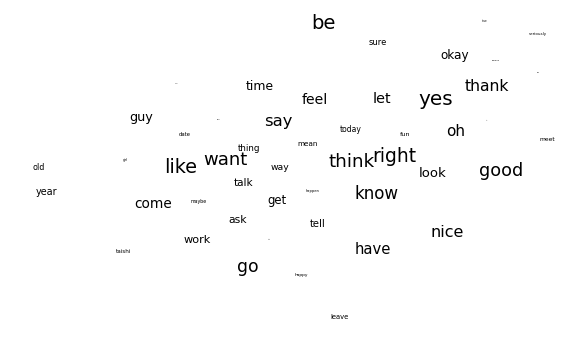

In [110]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsne[:, 0], tsne[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(target_words):
    ax.annotate(word, (tsne[:, 0][i],tsne[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

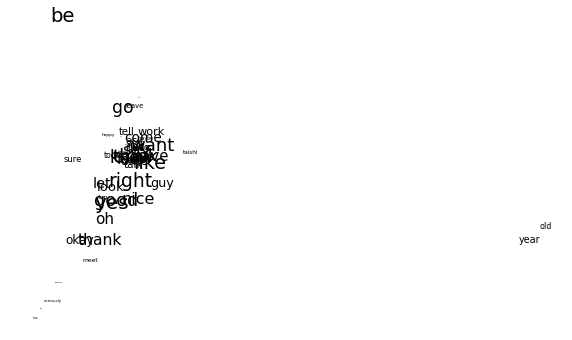

In [111]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(target_words):
    ax.annotate(word, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [112]:
import gensim

In [113]:
#see simlar words with people in the show
people_hw = ['lauren', 'yuya', 'yusuke','avian', 'naomi', 'eric', 'anna','taishi', 'niki','guy', 'cheri', 'wesley', 'jennifer','chikako','mariko','ryo']
people_kr = ['ami','yuudai','mizuki','taka', 'tsuchan','shion','shohei','seina','mayu', 'yui','noah','aya','shunsuke','kaito','maya','sota']
print('for the casts in aloha state season')
for person in people_hw:
  mm = dfw2v.wv.similar_by_word(person, topn = 10)
  print('the most similar words to ', person, ' is: ')
  for m in mm:
    print(m[0])
  print('-----------------------------------')

print('for the casts in Karuizawa season')
for person in people_kr:
  mm = dfw2v.wv.similar_by_word(person, topn = 10)
  print('the most similar words to ', person, ' is: ')
  for m in mm:
    print(m[0])
  print('-----------------------------------')



for the casts in aloha state season
the most similar words to  lauren  is: 
naomi
yusuke
ishikura
young
chikako
ryo
model
mila
guy
spa
-----------------------------------
the most similar words to  yuya  is: 
anna
de
cheri
spa
nakajima
eric
real
lauren
ishikura
model
-----------------------------------
the most similar words to  yusuke  is: 
chikako
lauren
naomi
young
ryo
sekikawa
pilot
musician
ishikura
shy
-----------------------------------
the most similar words to  avian  is: 
aspire
shibusawa
carpenter
pro
fukuyama
wesley
3rd
lorraine
tamaki
student
-----------------------------------
the most similar words to  naomi  is: 
lauren
yusuke
ishikura
model
musician
chikako
young
ryo
pilot
matarai
-----------------------------------
the most similar words to  eric  is: 
fashion
nakajima
cheri
de
real
anna
spa
tanaka
agent
aizawa
-----------------------------------
the most similar words to  anna  is: 
cheri
de
real
nakajima
eric
spa
yuya
lauren
fashion
taishi
--------------------------

In [114]:
#a couple that did not work out
mm = dfw2v.wv.most_similar(positive = ['lauren', 'yusuke'], negative=['artist', 'musician'])
for m in mm:
  print(m[0],m[1])


old 0.3084331154823303
year 0.2899929881095886
salesclerk 0.2247033417224884
ku 0.1958702802658081
lavoie 0.16981516778469086
tsai 0.16071242094039917
actor 0.12891243398189545
undecided 0.12464655935764313
niwa 0.1242174431681633
timer 0.12177018821239471


In [115]:
#a couple that has resulted in marriage
mm = dfw2v.wv.most_similar(positive = ['seina', 'noah'], negative = ['girlfriend'])
for m in mm:
  print(m[0],m[1])

ami 0.9980157613754272
guy 0.9977149963378906
shimabukuro 0.9973882436752319
yui 0.9973444938659668
type 0.9972044825553894
model 0.9970750212669373
tsubasa 0.9970149397850037
player 0.9969860315322876
artist 0.9969828128814697
naomi 0.9969285726547241


## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

In [116]:
df['tokenized_words'] = df['raw_data'].apply(lambda x: lucem_illud.word_tokenize(x))
df['normalized_words'] = df['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma = False))

In [117]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list


In [118]:
from numpy.ma.core import shape
df['name'] = index_hw
df['episode'] = df['name'].apply(lambda x: int(x[10:]))
tag_doc = []
casts = people_hw.extend(people_kr)
for index, row in df.iterrows():
  doc_key = list(set([i for i in people_hw if i in row['normalized_words']]))
  doc_key.append(row['episode'])
  doc_key.append(row['name'])
  doc_key = flatten_list(doc_key)
  tag_doc.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = doc_key))

df['tagged_texts'] = tag_doc

In [119]:
tag_doc[0]

LabeledSentence(words=['tonight', 'start', 'new', 'season', 'hawaii', 'terrace', 'house', 'aloha', 'state', 'hawaii', 'fun', 'fun', 'went', 'fun', 'work', 'trip', 'fun', 'confidence', 'fun', 'hawaii', 'hawaii', 'nice', 'day', 'yamachan', 'right', 'got', 'lost', 'ala', 'moana', 'center', 'like', 'break', 'seriously', 'hiccup', 'yu', 'told', 'definitely', 'eligible', 'bachelor', 'number', 'bachelor', 'right', 'yes', 'number', 'right', 'tokui', 'sweet', 'day', 'find', 'best', 'burger', 'place', 'yes', 'thank', 'easy', 'internet', 'yes', 'difference', 'astounding', 'torichan', 'hawaii', 'realized', 'different', 'men', 'got', 'trouble', 'customs', 'right', 'time', 'got', 'lost', 'got', 'plastered', 'yes', 'check', 'opened', 'luggage', 'lobby', 'opened', 'luggage', 'lobby', 'thinking', 'room', 'check', 'talking', 'm', 'sorry', 'yu', 'went', 'desk', 'said', 'guy', 'checked', 'late', 'said', 'checking', '3:00', 'a.m.', 'fun', 'happy', 'fun', 'terrace', 'house', 'currently', 'available', 'count

In [120]:
dfd2v = gensim.models.doc2vec.Doc2Vec(df['tagged_texts'], size = 1000) 

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [121]:
dfd2v.most_similar(positive = ['lauren', 'yusuke'], negative=['artist', 'musician'], topn = 10)

[('masato', 0.9207721948623657),
 ('seashells', 0.8683939576148987),
 ('relaxed', 0.8622595071792603),
 ('tsai', 0.8376728296279907),
 ('songs', 0.8011718988418579),
 ('shibusawa', 0.8004000782966614),
 ('advantage', 0.7950483560562134),
 ('share', 0.7815676927566528),
 ('pink', 0.7733873128890991),
 ('trash', 0.7684526443481445)]

In [122]:
dfd2v.most_similar(positive = ['niki', 'guy'], negative=['model', 'surfer'], topn = 10)

[('masato', 0.9285069108009338),
 ('tsai', 0.9043951034545898),
 ('mendonca', 0.8962470293045044),
 ('shibusawa', 0.8948724269866943),
 ('songs', 0.8880639672279358),
 ('salesclerk', 0.8664352893829346),
 ('pie', 0.8626712560653687),
 ('walking', 0.8572567701339722),
 ('baby', 0.8466628789901733),
 ('america', 0.8434138298034668)]

In [123]:
dfd2v.most_similar(positive = ['noah', 'seina'],negative = ['pilot','model'],  topn = 10)

[('masato', 0.841888427734375),
 ('songs', 0.790987491607666),
 ('tsai', 0.7735499143600464),
 ('mendonca', 0.7590885758399963),
 ('shibusawa', 0.7548158168792725),
 ('pie', 0.7288960814476013),
 ('trash', 0.7250552773475647),
 ('underwear', 0.7203251719474792),
 ('salesclerk', 0.7163604497909546),
 ('america', 0.7136736512184143)]

**I have implemented word vector analysis, especially on some couples in the show. More specifically, I hypothesized ([names of couple] - [their occupations]) as in the last exercise. My analysis reveals pretty much nothing. For example, the analysis on ['lauren', 'yusuke'] which did not work well as a result, reveals that the equation equals to 'niwa' (the last name of a cast in the show). Other two analysis did not work much as well. I think that the issue here is how I choose keywords to build the model. I chose the name of the casts and episodes, but it should be more relevant to the actual contexts in the show.**

## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why? 

<font color="red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

In [130]:
target_semantic = ['man','woman','boy','girl','muscle','feminine','hawaii','japan','tokyo',
                   'rich', 'poor','expensive', 'karuizawa','common',
                   'casual','formal','active','relax','model','player',
                   'surfer','artist','student','carpenter','chef','musician','pilot',
                   'actor','retailer','banker','skateboard','snowboard',
                   'hockey','soccer','basketball']
submatrix_semantic = []
for word in target_semantic:
  submatrix_semantic.append(dfw2v[word])
submatrix_semantic = np.array(submatrix_semantic)

In [139]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [140]:
gender = dimension(dfw2v, ['man','boy','muscle'],['woman','girl','feminine'])
class_ = dimension(dfw2v,['rich', 'expensive'],['poor', 'common'])
type_ = dimension(dfw2v, ['casual', 'active'],['formal','relax'])

In [141]:
occ = ['model','player','surfer','artist','student','carpenter','chef','musician','pilot','actor','retailer','banker']
sports = ['skateboard','snowboard','hockey','soccer','basketball']



In [142]:
pca_s = sklearn.decomposition.PCA(n_components=20).fit(submatrix_semantic)
reduced_pca_s = pca_s.transform(submatrix_semantic)
tsne_semantic = sklearn.manifold.TSNE(n_components = 2).fit_transform(reduced_pca_s)

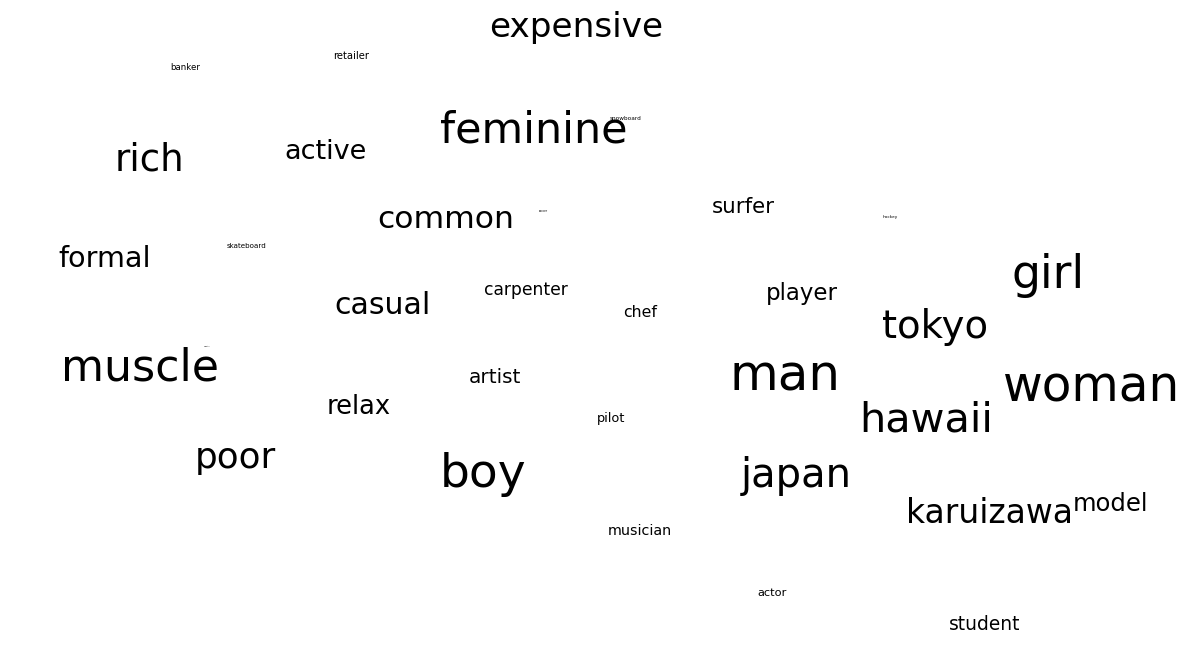

In [143]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsne_semantic[:, 0], tsne_semantic[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(target_semantic):
    ax.annotate(word, (tsne_semantic[:, 0][i],tsne_semantic[:, 1][i]), size =  50 * (len(tsne_semantic) - i) / len(tsne_semantic))
plt.xticks(())
plt.yticks(())
plt.show()

In [146]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(dfw2v[word].reshape(1,-1), gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(dfw2v[word].reshape(1,-1), class_.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(dfw2v[word].reshape(1,-1), type_.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'gender': g, 'class': r, 'type': c}, index = word_list)
    return df

In [147]:
occdf = makeDF(dfw2v, occ)
sportsdf = makeDF(dfw2v, sports)

In [148]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

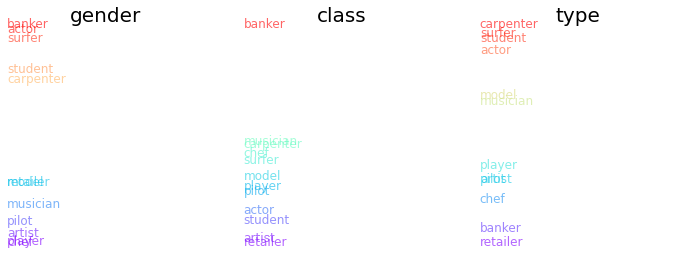

In [149]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, occdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, occdf, 'class')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, occdf, 'type')
plt.show()

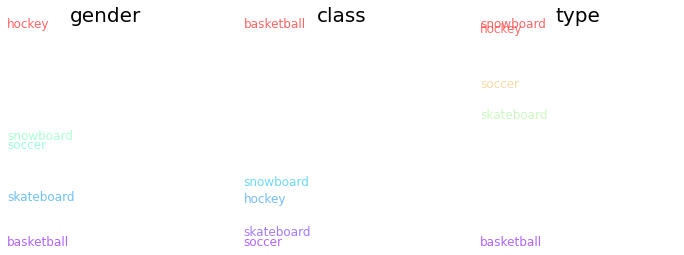

In [150]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, sportsdf, 'class')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, sportsdf, 'type')
plt.show()

**Both semantic spaces on sports and occupation are accurately describe the character of the casts corresponding to gender/class/type. For example, 'Tsubasa' who is a feminine professional hockey player is not from wealthy family and is rather casual in their life style.**

You would increase the sample size if you want to do a more serious study.

## <font color="red">*Exercise 4a*</font>

<font color="red">**Do only 4a or 4b.** Construct cells immediately below this that calculate the scores for a small sample of documents from outside your corpus to identify which are *closest* to your corpus. Then calculate the scores for a few phrases or sentences to identify the ones most likely to have appeared in your corpus. Interrogate patterns associated with these document/phrase scores (e.g., which companies produced job ads most or least likely to find jobseekers in the resume corpus?) What do these patterns suggest about the boundaries of your corpus?

In [173]:
doc_pth = '/content/drive/MyDrive/class_content_analysis/srt'

raw_data = []
file = open(doc_pth, "r",encoding="utf-8", errors='ignore')
lines = file.readlines()
file.close()

for line in lines[24:]:
  if not line.startswith('00') and line!='\n':
    word=line
    if '\n' in word:
      word = word.replace('\n', '')
    if '<i>' in word:
      word = word.replace('<i>','')
    if '</i>' in word:
      word = word.replace('</i>', '')
    if '{\\an8}' in word:
      word = word.replace('{\\an8}', '')
    if not word.isdecimal():
      if word.startswith('-'):
        raw_data.append(word[1:])
      else:
        raw_data.append(word)



In [188]:
reduced_doc = []
n=0
for line in raw_data:
  if len(line)>30:
    reduced_doc.append(line)

df_supp = pd.DataFrame({'raw_data': reduced_doc})

In [190]:
df_supp['tokenized_sents'] = df_supp['raw_data'].apply(lambda x:[lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)] )
df_supp['normalized_sents'] = df_supp['tokenized_sents'].apply(lambda x:[lucem_illud.normalizeTokens(s) for s in x])

In [192]:
def adprob(ad, model):
    sen_scores = model.score(ad, len(ad))
    ad_score = sen_scores.mean()
    return ad_score

In [197]:
dfw2v_score = gensim.models.word2vec.Word2Vec(df['normalized_sents'].sum(), sg=0, hs=2, negative=0)

In [198]:
df_supp['likelihood'] = df_supp['normalized_sents'].apply(lambda x: adprob(x, dfw2v_score))

In [202]:
for ad in df_supp.sort_values(by='likelihood',ascending = False)['raw_data'][:5]:
  print(ad + '\n\n')


"Why am I struggling with this?"


It doesn't have to be the aquarium.


It doesn't have to be the aquarium.


After that, Makocchan texted me,


who's the fur seal, who's the walrus,




In [206]:
for ad in df_supp.sort_values(by='likelihood')['raw_data'][:5]:
  print(ad + '\n\n')


MIZUKI SHIDA, 22 YEARS OLD, OFFICE WORKER


Remarkable in the tap dance world.


he got nervous, and in a bad way,


National champion three years in a row.


Yuki is amazing at tap dancing.




**As a experiment, I extracted subtitle from different seasons of terrace house to implement this analysis. However, since each sentence is not tagged with information (ex: who says what, relationship), it is hard to scrutinize actual patterns underlying possible matching among the casts across different seasons. This could be something that I have to consider further**  